In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from clean_data import featurize_text

In [3]:
pd.set_option("max_rows", 100)
pd.set_option("max_colwidth", 2000)

In [4]:
train_set = pd.read_csv('./data/Corona_NLP_train_clean.csv')
test_set = pd.read_csv('./data/Corona_NLP_test_clean.csv')

In [5]:
nlp = English()

In [6]:
tfidf_vectorizer = TfidfVectorizer(tokenizer = featurize_text)
X_train = tfidf_vectorizer.fit_transform(train_set['OriginalTweet'])
X_test = tfidf_vectorizer.transform(test_set['OriginalTweet'])
y_train = train_set['SentimentCode'].values
y_test = test_set['SentimentCode'].values

In [7]:
from sklearn.linear_model import  LogisticRegression
lin_class = LogisticRegression(max_iter=400)
lin_class.fit(X_train, y_train)

LogisticRegression(max_iter=400)

In [8]:
from sklearn.metrics import f1_score, plot_confusion_matrix

In [9]:
predict_train = lin_class.predict(X_train)
predict_test = lin_class.predict(X_test)

In [10]:
predict_train

array([2, 2, 2, ..., 2, 2, 0], dtype=int64)

In [11]:
f1_score(predict_train, y_train, average=None)

array([0.90645297, 0.85603704, 0.92065819])

In [12]:
f1_score(predict_test, y_test, average=None)

array([0.78204734, 0.62835249, 0.79564931])

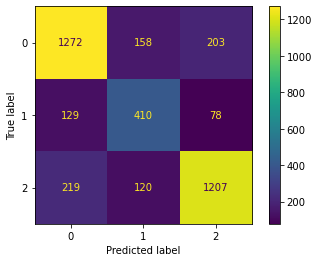

In [13]:
plot_confusion_matrix(lin_class, X_test, y_test)

# Let's wrap it all up in a pipeline

In [14]:
steps = (('vectorizer', tfidf_vectorizer), ('classifier', lin_class))

In [15]:
from sklearn.pipeline import Pipeline
short_pipeline = Pipeline(steps)

In [16]:
import pickle
with open('./models/linear_classifier.pkl', 'wb') as f:
    pickle.dump(short_pipeline, f)